In [240]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [245]:
img1 = cv2.imread('source/template.jpg')  # 替换为你的第一张图片路径
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [246]:
# 椭圆参数
center_coordinates = (int(884), int(554))  # 椭圆中心 (x, y)
axes_lengths = (int(448.944 / 2), int(446.030 / 2))  # OpenCV使用半轴
angle = 0
start_angle = 0  # 起始角度
end_angle = 360  # 终止角度
color = (255, 255, 255)  # 白色椭圆 (RGB)
thickness = 2  # 椭圆线的厚度

In [247]:
gray_img2 = cv2.ellipse(img1, center_coordinates, axes_lengths, angle, start_angle, end_angle, color, thickness)

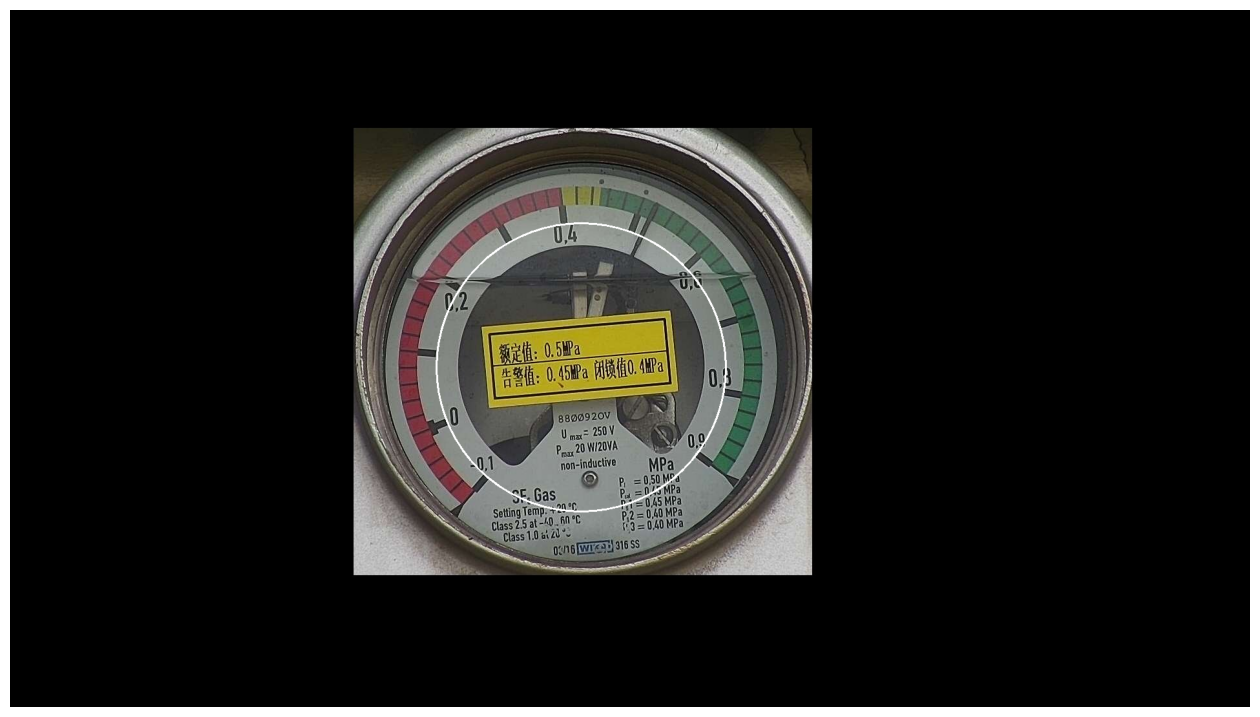

In [248]:
# 使用matplotlib显示结果
plt.figure(figsize=(16,16))
plt.imshow(gray_img2)
plt.axis('off')  # 隐藏坐标轴
plt.show()
    


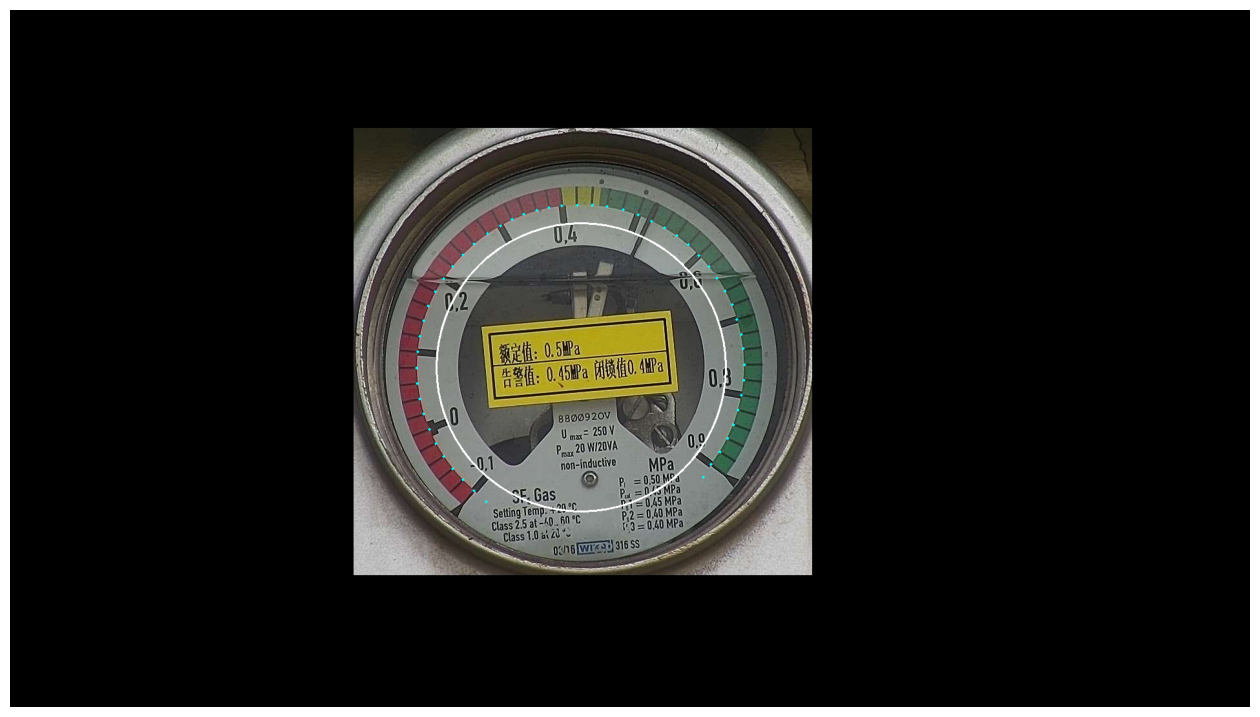

In [249]:
standard_point = [
    (737,762),
    (718,745), 
    (701,728),
    (685,711),
    (671,692),
    (659,672),
    (649,650),
    (640,626),
    (634,603),
    (630,579),
    (629,555),
    (631,530),
    (634,506),
    (640,482),
    (647,459),
    (658,437),
    (671,417),
    (685,398),
    (701,380),
    (718,363),
    (739,347),
    (759,335),
    (777,325),
    (795,317),
    (815,311),
    (834,307),
    (854,304),
    (878,303),
    (901,303),
    (924,305),
    (949,310),
    (972,318),
    (993,328),
    (1013,338),
    (1032,350),
    (1050,364),
    (1066,381),
    (1082,398),
    (1094,416),
    (1107,436),
    (1118,457),
    (1125,480),
    (1132,503),
    (1135,525),
    (1137,550),
    (1136,574),
    (1132,597),
    (1127,620),
    (1120,643),
    (1111,664),
    (1099,685),
    (1085,704),
    (1073,724)
]
for point in standard_point:
    cv2.circle(gray_img2, point, radius=2, color=(0,255,255), thickness=-1)
    
plt.figure(figsize=(16,16))
plt.imshow(gray_img2)
plt.axis('off')  # 隐藏坐标轴
plt.show()
    

In [250]:
def sperate_point(point1, point2):

    # 计算向量1和向量2
    vector1 = (point1[0] - center_coordinates[0], point1[1] - center_coordinates[1]) 
    vector2 = (point2[0] - center_coordinates[0], point2[1] - center_coordinates[1]) 

    # 计算与水平轴的夹角（弧度）
    theta1 = np.arctan2(vector1[1], vector1[0])
    theta2 = np.arctan2(vector2[1], vector2[0])
    
    if theta1 < theta2: theta1, theta2 = theta2, theta1
    # # 生成中间点
    num_points = 10  # 等分点数
    t_values = np.linspace(theta1, theta2, num_points + 1)  # 等间距划分
    
    # # 计算椭圆上的点（在椭圆旋转前）
    points = []
    for t in t_values:
        x = axes_lengths[0] * np.cos(t)
        y = axes_lengths[1] * np.sin(t)
    
        # # 应用旋转变换
        rotation_matrix = np.array([
            [np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
            [np.sin(np.radians(angle)), np.cos(np.radians(angle))]
        ])

        rotated_point = rotation_matrix @ np.array([x, y])
        points.append((int(rotated_point[0] + center_coordinates[0]), int(rotated_point[1] + center_coordinates[1])))

    # # 绘制分点，并显示红色端点
    # for i, point in enumerate(points):
    #     if i % 2 : continue
    #     color = (0, 0, 255) if i == 0 or i == len(points) - 1 else (0, 255, 0)  # 红色端点，绿色中间点
    #     cv2.circle(gray_img2, point, radius=1, color=color, thickness=-1)
    return points[:-1]

In [251]:
candidate_point = []
for i in range(len(standard_point) - 1):
    candidate_point += sperate_point(standard_point[i], standard_point[i + 1])

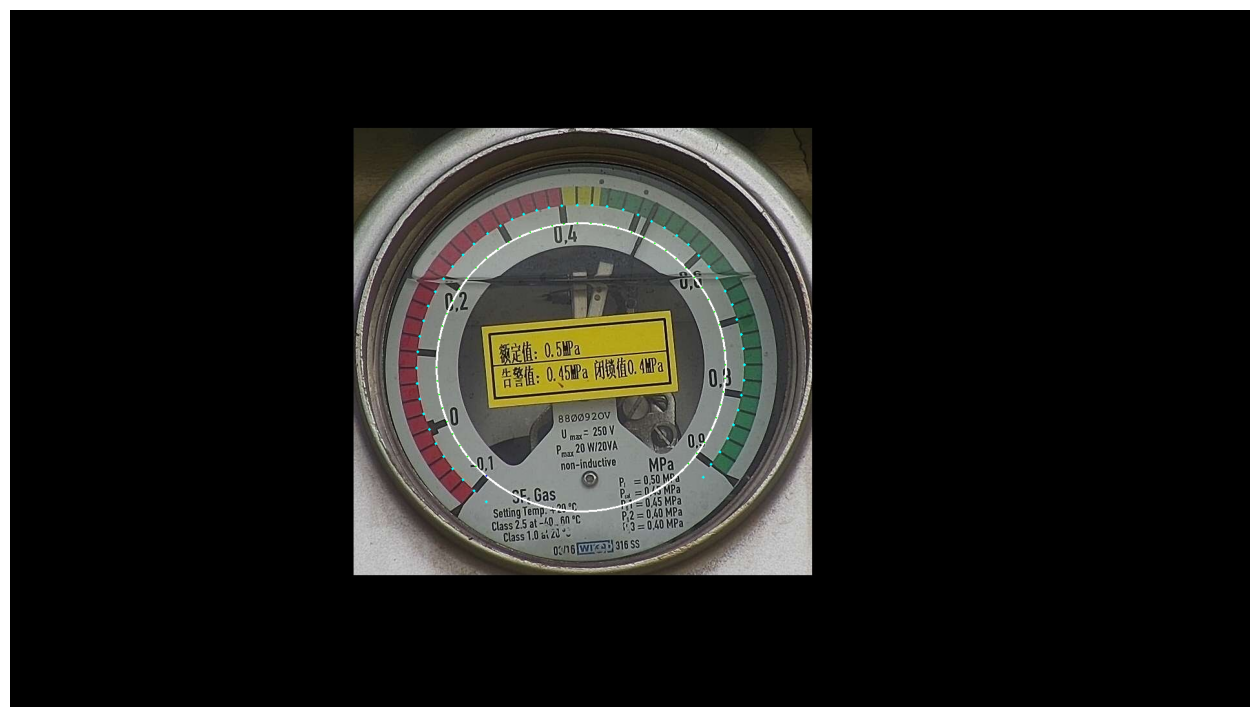

In [252]:
for i, point in enumerate(candidate_point):
    if i % 10 : continue
    color = (0, 0, 255) if i == 0 or i == len(candidate_point) - 1 else (0, 255, 0)  # 红色端点，绿色中间点
    cv2.circle(gray_img2, point, radius=1, color=color, thickness=-1)
    
    
plt.figure(figsize=(16,16))
plt.imshow(gray_img2)
plt.axis('off')  # 隐藏坐标轴
plt.show()

In [253]:
img1 = cv2.imread('source/template.jpg')  # 替换为你的第一张图片路径
img2 = cv2.imread('source/1.1/tv201712271646576FW62O.jpg')  # 替换为你的第二张图片路径

# 将图片转换为灰度图像
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

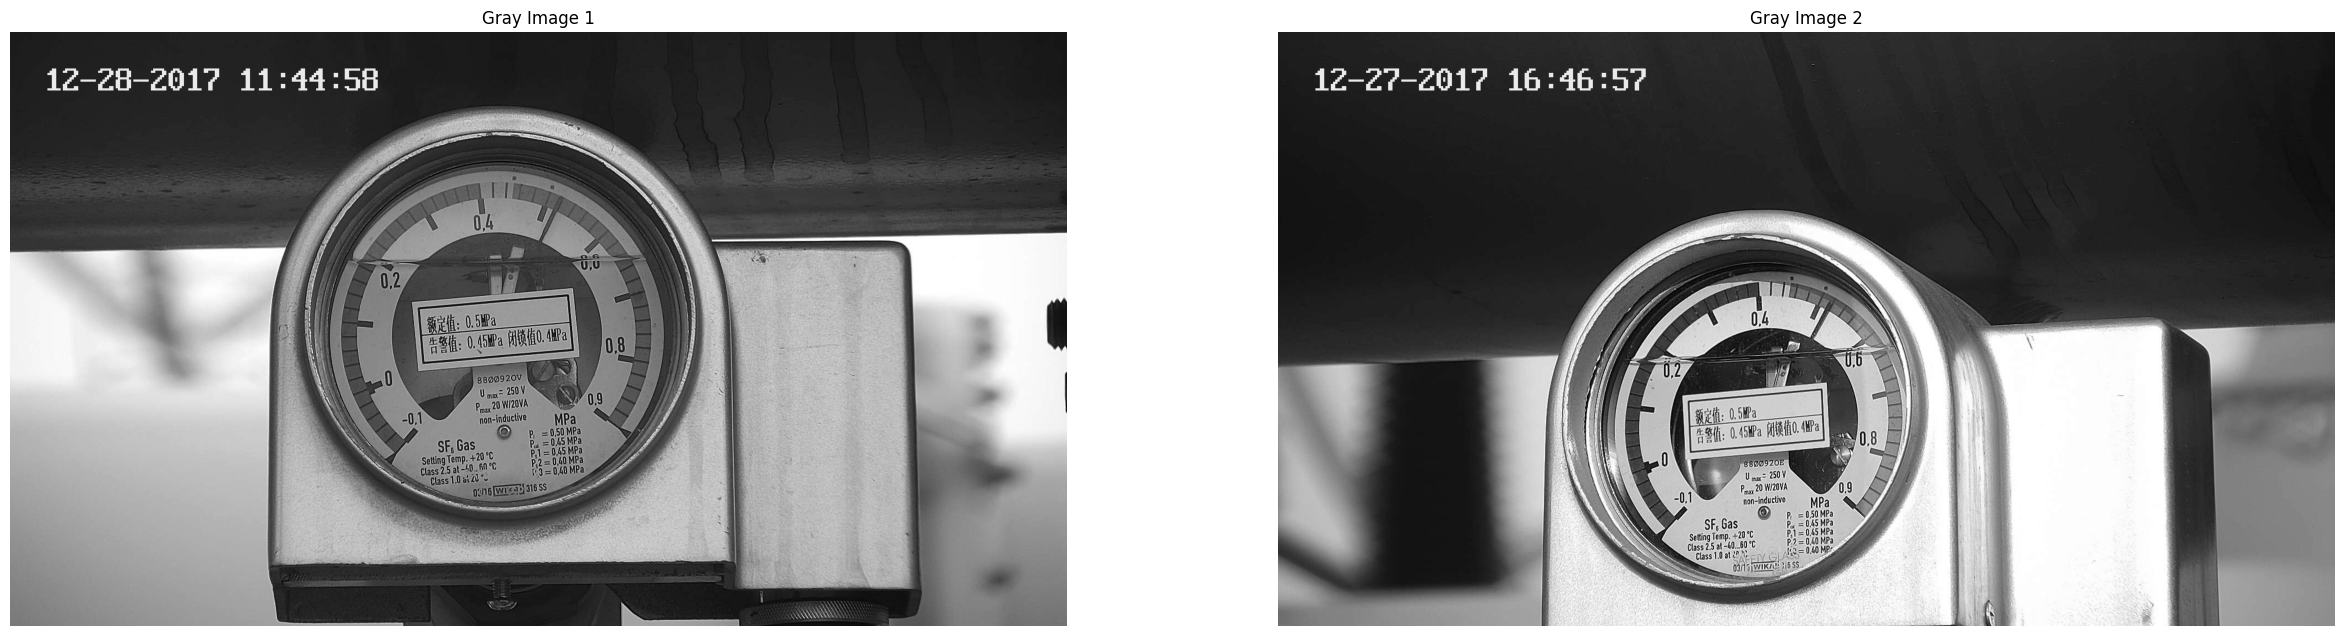

In [254]:
# 使用 matplotlib 展示图片
plt.figure(figsize=(30, 15))

# 显示第一张灰度图
plt.subplot(1, 2, 1)
plt.imshow(gray_img1, cmap='gray')
plt.title('Gray Image 1')
plt.axis('off')  # 关闭坐标轴

# 显示第二张灰度图
plt.subplot(1, 2, 2)
plt.imshow(gray_img2, cmap='gray')
plt.title('Gray Image 2')
plt.axis('off')  # 关闭坐标轴

# 展示图片
plt.show()

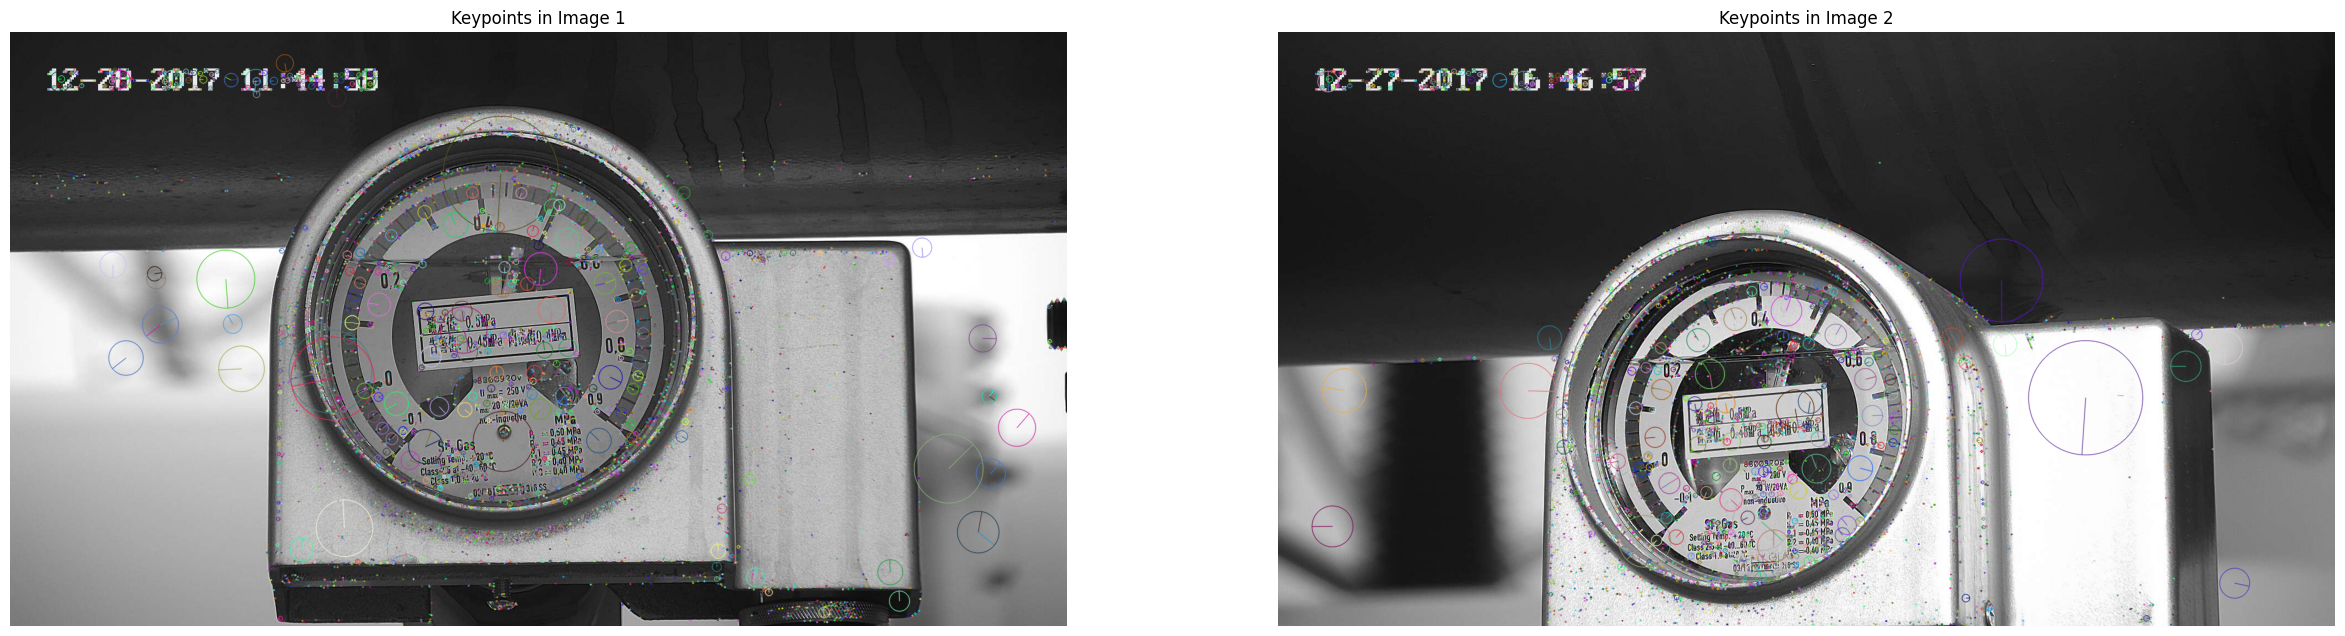

In [255]:
# 使用SIFT检测特征点和计算描述符
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray_img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_img2, None)

# 显示特征点
img1_with_keypoints = cv2.drawKeypoints(gray_img1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_with_keypoints = cv2.drawKeypoints(gray_img2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(30, 15))

plt.subplot(1, 2, 1)
plt.imshow(img1_with_keypoints, cmap='gray')
plt.title('Keypoints in Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_with_keypoints, cmap='gray')
plt.title('Keypoints in Image 2')
plt.axis('off')

plt.show()

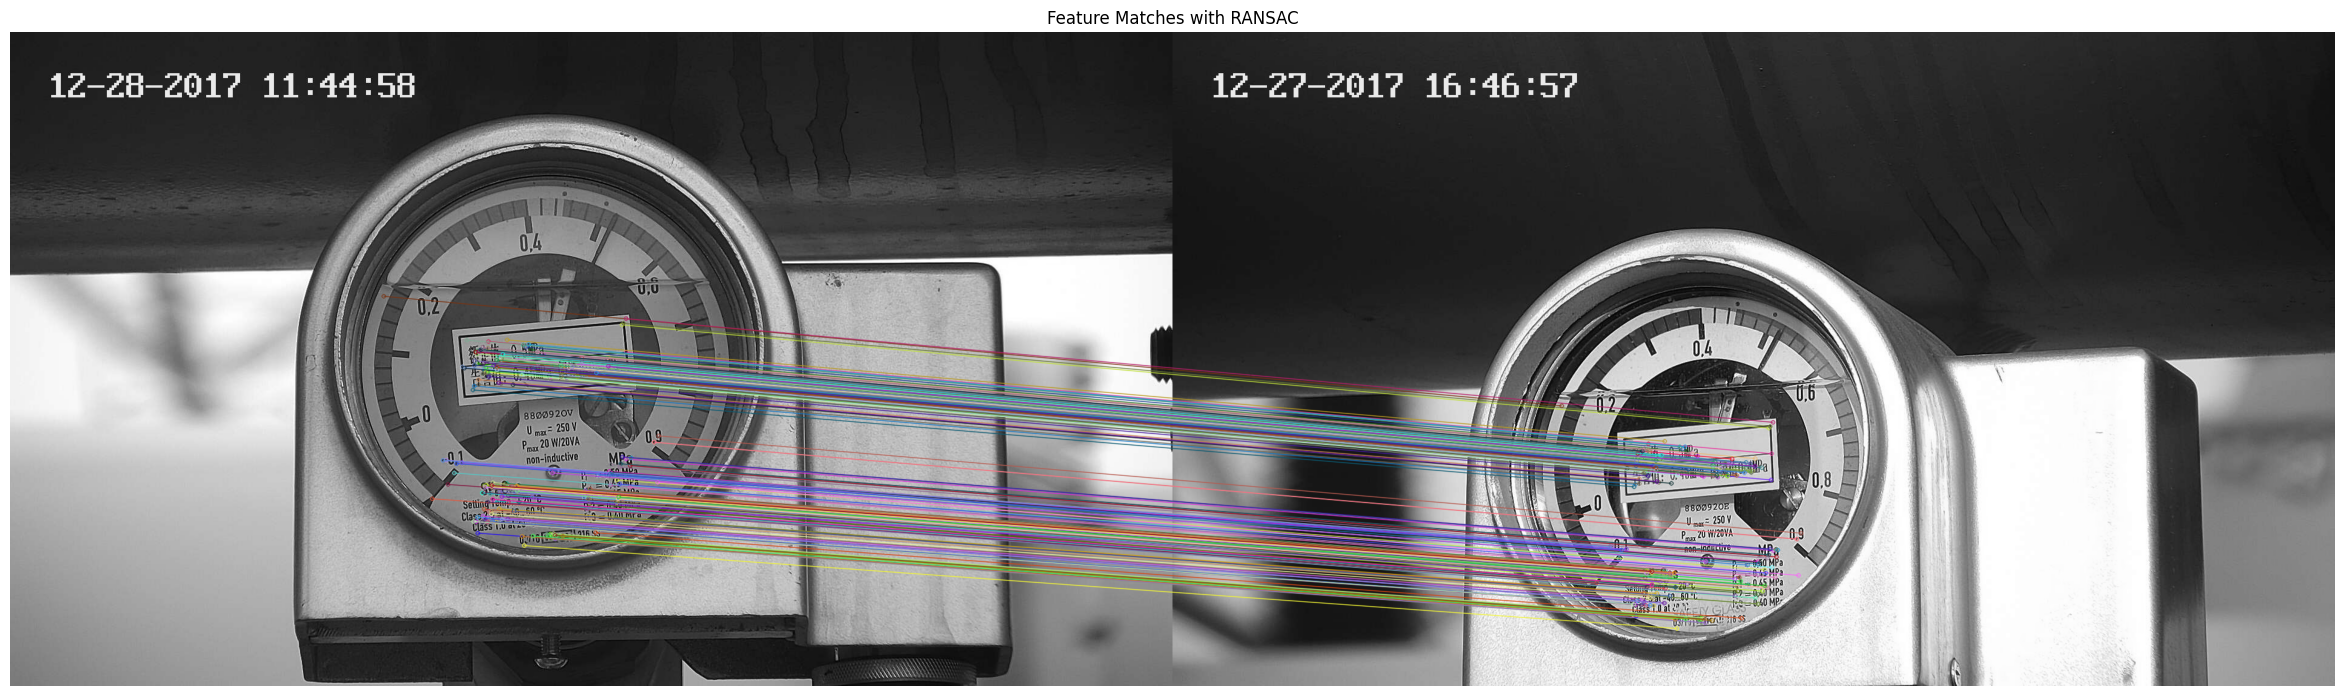

In [256]:
# 使用 BFMatcher 进行匹配
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# 根据匹配距离排序，优先选择最好的匹配
matches = sorted(matches, key=lambda x: x.distance)

# 提取好的匹配的点的坐标
points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# 利用 RANSAC 方法估计单应矩阵
H, mask = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)

# 使用 mask 来选出内点匹配
matches_mask = mask.ravel().tolist()

# 投影图1的点到图2
projected_points1 = cv2.perspectiveTransform(points1, H)

# 画出投影后的点和原始点的匹配情况
result_img = cv2.drawMatches(gray_img1, keypoints1, gray_img2, keypoints2, 
                             [m for i, m in enumerate(matches) if matches_mask[i]], 
                             None, 
                             flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 显示匹配结果
plt.figure(figsize=(30, 15))
plt.imshow(result_img)
plt.title('Feature Matches with RANSAC')
plt.axis('off')
plt.show()

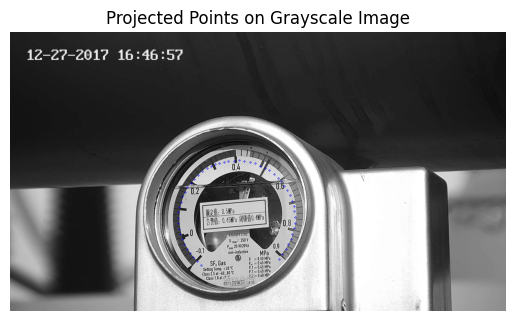

<Figure size 1500x1500 with 0 Axes>

In [257]:
# 将标准点转换为 numpy 数组并应用单应矩阵投影到 img2
arc_points_np = np.array(standard_point, dtype=np.float32).reshape(-1, 1, 2)
projected_points = cv2.perspectiveTransform(arc_points_np, H)

# 在 img2 上绘制投影点
plt.imshow(gray_img2, cmap='gray')  # 显示灰度图像

# 在 matplotlib 中使用 scatter 绘制彩色点
for i, point in enumerate(projected_points):
    x, y = point[0][0], point[0][1]
    plt.scatter(x, y, color='blue', s=0.1)  # s 参数控制点的大小

plt.title('Projected Points on Grayscale Image')
plt.axis('off')  # 隐藏坐标轴
plt.figure(figsize=(15, 15))
plt.show()